In [30]:
import os
import pandas as pd
import seaborn as sns
import statistics
from matplotlib import pyplot as plt
%matplotlib inline


In [2]:

workdir = 'Q:/Messdaten/floodVisionData/core_2018_cq/_temp/190326'
# define log file
log_file = os.path.join(workdir, 'results.csv')

In [3]:
data = pd.read_csv(log_file)

In [165]:
# fix sensor count issue: recount trends and sensors
for idx, row in data.iterrows():
    row['meta_count_trend'] = row['meta_observations'].split('_').count('trend')
    row['meta_count_sensor'] = row['meta_observations'].split('_').count('sensor')


In [166]:
# Add column indicating change calibration-validation difference
data['error_delta'] = data.error - data.cal_err

In [167]:
data.head(3)

,par_r_surf,par_r_p3,par_r_px,par_cd_m1,par_d_s6,par_cd_r4,error,run_count,cal_err,type,time,meta_event_val,meta_event_cal,meta_observations,meta_source_count,meta_count_sensor,meta_count_trend,error_delta
0,0.00639,0.010460,0.003725,0.4456,0.08080,0.7295,0.193195,673,-0.2815,calibration,2019-03-26 19:31:44.528667,Event 20,20,s3_trend-s5_trend-s6_trend,3,0,3,0.474695
1,0.00833,0.010315,0.003834,0.4580,0.07855,0.7363,0.195455,818,-0.2817,calibration,2019-03-26 19:31:45.184733,Event 20,20,s3_trend-s5_trend-s6_trend,3,0,3,0.477155
2,0.00607,0.010400,0.003720,0.4500,0.08570,0.7360,0.194475,663,-0.2817,calibration,2019-03-26 19:31:45.860801,Event 20,20,s3_trend-s5_trend-s6_trend,3,0,3,0.476175


In [288]:
# define metadata columns by which to group data
id_cols = ['type', 'meta_event_val', 'meta_event_cal', 'meta_count_sensor', 'meta_count_trend', 'meta_observations', 'meta_source_count']

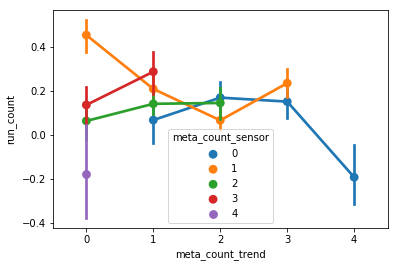

In [290]:
# check that calibration is complete (does calibration error correlate with run count)
# first select n last runs
g1 = data.sort_values('cal_err',ascending = True).groupby(id_cols).head(10).groupby(id_cols)
corr = g1.corr(method='spearman').reset_index(level=7)
corr = corr[corr.level_7 == 'cal_err'].reset_index()
sns.pointplot(x='meta_count_trend', y='run_count', hue='meta_count_sensor', data=corr)

The 20 best runs seem independent from calibration step

In [291]:
d20 = data.sort_values('cal_err',ascending = True).groupby(id_cols).head(20)

In [292]:
# Group
g20 = d20.groupby(id_cols)

In [293]:
# Compute stats
grouped_stats = pd.melt(g20.std().reset_index(), id_vars=id_cols, value_name='std')
grouped_stats['mean'] = pd.melt(g20.mean().reset_index(), id_vars=id_cols, value_name='mean')['mean']
grouped_stats['varcoeff'] = grouped_stats['std']/grouped_stats['mean']
grouped_stats.head(3)

,type,meta_event_val,meta_event_cal,meta_count_sensor,meta_count_trend,meta_observations,meta_source_count,variable,std,mean,varcoeff
0,calibration,Event 20,20,0,1,c3_trend,1,par_r_surf,0.003803,0.013928,0.273025
1,calibration,Event 20,20,0,1,s3_trend,1,par_r_surf,0.002342,0.004420,0.529789
2,calibration,Event 20,20,0,1,s5_trend,1,par_r_surf,0.000651,0.002208,0.295075


## Coefficient of variation of parameters is reduced through calibration

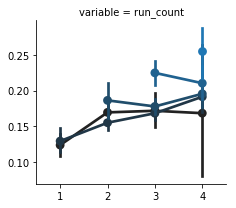

In [295]:
f = sns.FacetGrid(grouped_stats[grouped_stats.variable.str.match('run')], col="variable",  col_wrap=3, sharey=False)
f.map_dataframe(sns.pointplot, x='meta_source_count', hue='meta_count_sensor', y='varcoeff')

In [174]:
#  create selection of data results for analysis: median of validation data
dres = d20[g20['error'].transform('max') == d20.error]
dres

,par_r_surf,par_r_p3,par_r_px,par_cd_m1,par_d_s6,par_cd_r4,error,run_count,cal_err,type,time,meta_event_val,meta_event_cal,meta_observations,meta_source_count,meta_count_sensor,meta_count_trend,error_delta
59986,0.016170,0.011320,0.008470,0.3990,0.07130,0.8390,0.320521,216,-1.491000,validation,2019-03-29 18:47:37.096386,Event 24,22,s3_trend-s5_trend-s6_trend-c3_sensor,4,1,3,1.811521
59792,0.017350,0.010100,0.015350,0.4840,0.06027,0.8950,0.190408,168,-1.491000,calibration,2019-03-29 18:44:39.357386,Event 22,22,s3_trend-s5_trend-s6_trend-c3_sensor,4,1,3,1.681408
59842,0.017350,0.010100,0.015350,0.4840,0.06027,0.8950,0.209099,168,-1.491000,validation,2019-03-29 18:45:22.177386,Event 20,22,s3_trend-s5_trend-s6_trend-c3_sensor,4,1,3,1.700099
59888,0.017180,0.010330,0.010630,0.4420,0.04376,0.7230,0.194057,200,-1.491000,validation,2019-03-29 18:46:01.531386,Event 21,22,s3_trend-s5_trend-s6_trend-c3_sensor,4,1,3,1.685057
59938,0.017180,0.010330,0.010630,0.4420,0.04376,0.7230,0.226008,200,-1.491000,validation,2019-03-29 18:46:46.536386,Event 23,22,s3_trend-s5_trend-s6_trend-c3_sensor,4,1,3,1.717008
61840,0.005604,0.012970,0.002577,0.4710,0.03766,0.9400,0.192587,268,-1.468000,validation,2019-03-29 20:40:07.990302,Event 20,22,s3_sensor-s5_trend-s6_trend-c3_sensor,4,2,2,1.660587
61992,0.019230,0.011660,0.004800,0.5537,0.06775,0.9297,0.353637,127,-1.468000,validation,2019-03-29 20:42:26.407302,Event 24,22,s3_sensor-s5_trend-s6_trend-c3_sensor,4,2,2,1.821637
61938,0.012314,0.011410,0.005570,0.4644,0.04190,0.7910,0.200920,283,-1.468000,validation,2019-03-29 20:41:31.483302,Event 23,22,s3_sensor-s5_trend-s6_trend-c3_sensor,4,2,2,1.668920
61774,0.014400,0.011750,0.011856,0.5293,0.04270,0.9897,0.174946,210,-1.467000,calibration,2019-03-29 20:39:14.596302,Event 22,22,s3_sensor-s5_trend-s6_trend-c3_sensor,4,2,2,1.641946
61875,0.013750,0.010520,0.004955,0.3887,0.05045,0.6930,0.199512,190,-1.467000,validation,2019-03-29 20:40:39.463302,Event 21,22,s3_sensor-s5_trend-s6_trend-c3_sensor,4,2,2,1.666512


In [244]:
medians = g20.median().reset_index()
medians = medians[medians.type == 'validation']
medians.head(3)
dmin = g20.min().reset_index()

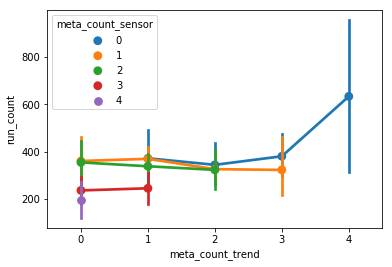

In [297]:
sns.pointplot(x='meta_count_trend', y='run_count', hue='meta_count_sensor', style='meta_event_val', data=dmin[(dmin.type == 'calibration')])

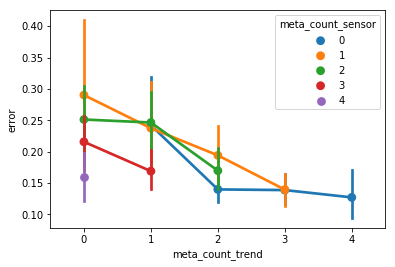

In [300]:
sns.pointplot(x='meta_count_trend', y='error', hue='meta_count_sensor', style='meta_event_val', data=dmin[(dmin.type == 'calibration')])

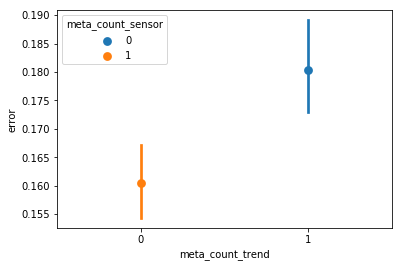

In [259]:
sns.pointplot(x='meta_count_trend', y='error', hue='meta_count_sensor', style='meta_event_val', 
              data=d20[(d20.type == 'validation') & ~d20.meta_observations.str.contains('s3|s5|c3')])

In [241]:
sns.pointplot(x='meta_count_trend', y='error', hue='meta_count_sensor', data=medians[ (medians.type == 'calibration') ])

ValueError: min() arg is an empty sequence

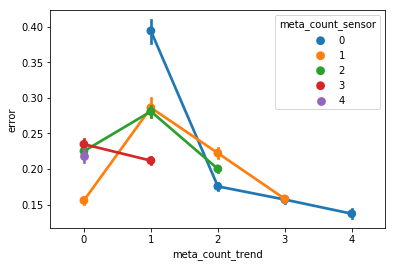

In [302]:
sns.pointplot(x='meta_count_trend', y='error', hue='meta_count_sensor', 
              data=d20[(d20.type == 'validation') & (d20.meta_observations.str.contains('s5'))])

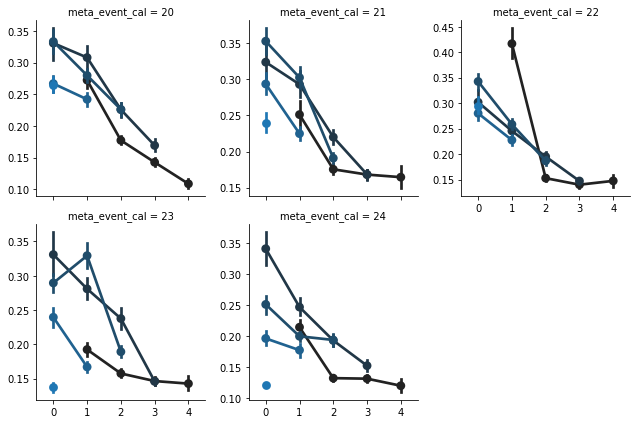

In [279]:
f = sns.FacetGrid(data=d20, col="meta_event_cal",  col_wrap=3, sharey=False)
f.map_dataframe(sns.pointplot, x='meta_count_trend', y='error', hue='meta_count_sensor')

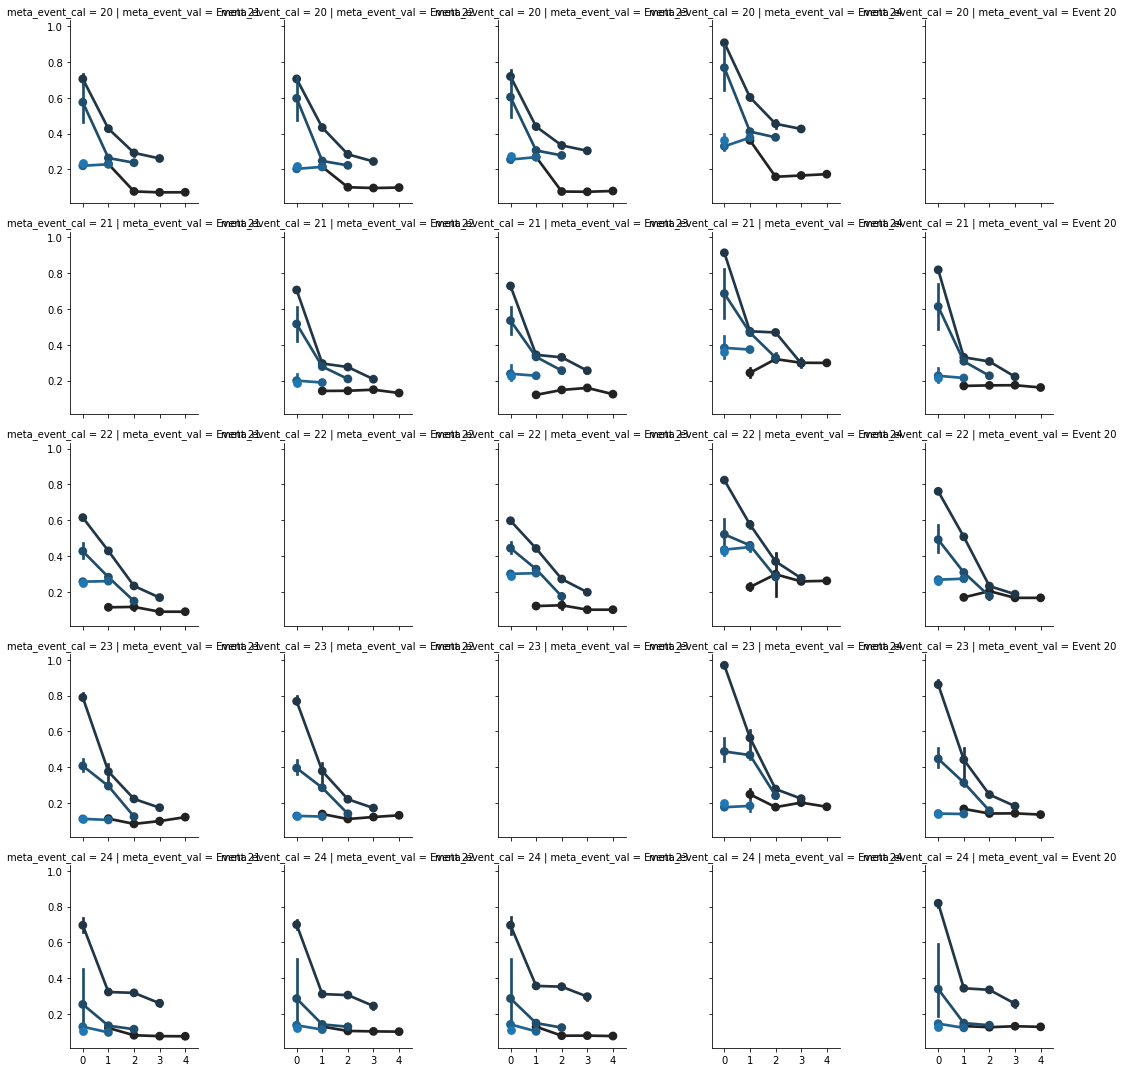

In [41]:
f = sns.FacetGrid(dres, col="meta_event_val",  row="meta_event_cal")
f.map_dataframe(sns.pointplot, x='meta_count_trend', y='error', hue='meta_count_sensor')